In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
df['University Rating'].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [ ]:
X

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,X.shape)

(400, 7) (100, 7) (500, 7)


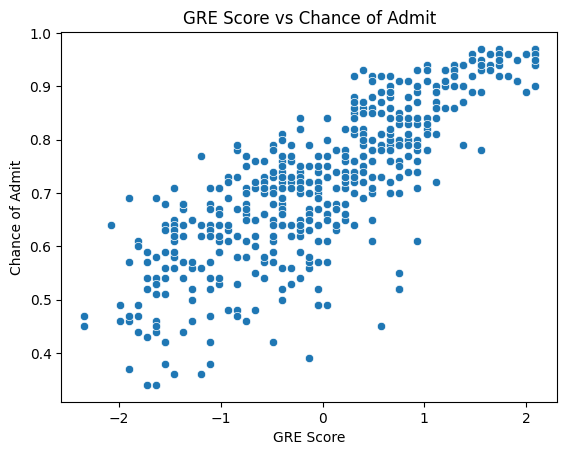

In [ ]:
sns.scatterplot(x=X[:, 0], y=Y)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.show()

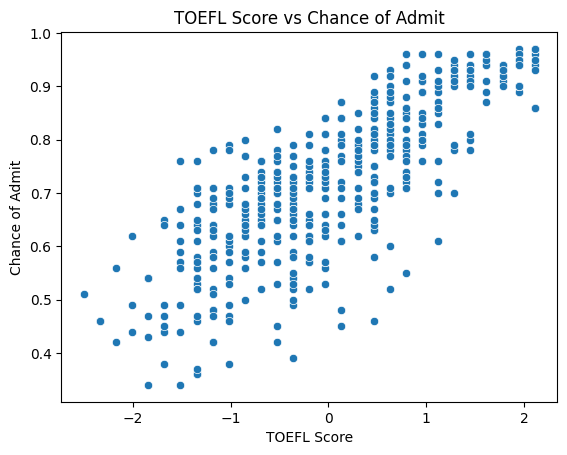

In [ ]:
sns.scatterplot(x=X[:,1],y=Y)
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

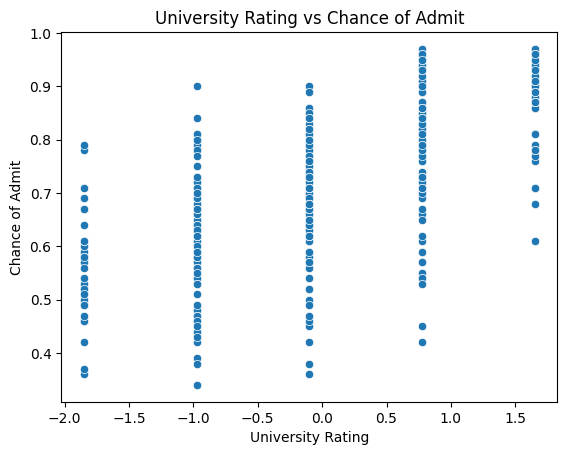

In [ ]:
sns.scatterplot(x=X[:,2],y=Y)
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.title('University Rating vs Chance of Admit')
plt.show()#Data Is Standardized

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import kerastuner as kt

<ipython-input-43-cd6bd038aa61>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
model=Sequential()
model.add(Dense(36,activation='relu',input_dim=7))
model.add(Dropout(0.5))
model.add(Dense(45,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.8653 - mae: 0.7726 - val_loss: 0.2311 - val_mae: 0.4338
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3696 - mae: 0.5082 - val_loss: 0.1162 - val_mae: 0.3023
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3567 - mae: 0.4783 - val_loss: 0.0892 - val_mae: 0.2623
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3018 - mae: 0.4496 - val_loss: 0.0788 - val_mae: 0.2453
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2988 - mae: 0.4296 - val_loss: 0.0794 - val_mae: 0.2468
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2451 - mae: 0.3982 - val_loss: 0.0867 - val_mae: 0.2600
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2456 - mae: 0.3642 - val_loss: 0.0979 - val_mae: 0.2810
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2243 - mae: 0.3827 - val_loss: 0.0978 - val_mae: 0.2816
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1817 - mae

In [ ]:
def build_model(hp):
  model = Sequential()

  # Input layer with appropriate input_dim
  model.add(Dense(
                hp.Int('units', min_value=1, max_value=200, step=5),
                activation=hp.Choice('activation', values=['relu', 'sigmoid', 'tanh']),
                input_dim=7  # Make sure this matches the number of features in your X_train data
            ))
  model.add(Dropout(hp.Choice('dropout', values=[0.1, 0.2, 0.3, 0.4, 0.5])))

  # Hidden layers (optional)
  for i in range(hp.Int('num_layers', 1, 5)):  # Adjusted range for num_layers
    model.add(Dense(
                  hp.Int('units_' + str(i), min_value=1, max_value=200, step=5),
                  activation=hp.Choice('activation_' + str(i), values=['relu', 'sigmoid', 'tanh'])
              ))
    model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5])))

  # Output layer
  model.add(Dense(1, activation='linear'))  # Make sure this matches the shape of your Y_train data

  model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd']),
                loss='mse',
                metrics=['mae'])  # Changed metric to 'mae'
  return model


In [ ]:
tuner=kt.RandomSearch(
  build_model,
  objective='val_mae',
  max_trials=5,
  directory='project',
  project_name='admission'
)

Reloading Tuner from project/admission/tuner0.json


In [ ]:
tuner.search(X_train,Y_train,epochs=10,validation_split=0.2)

Trial 5 Complete [00h 00m 06s]
val_mae: 0.11572004854679108

Best val_mae So Far: 0.11572004854679108
Total elapsed time: 00h 01m 57s


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters()
print(best_hyperparameters[0].values)

{'num_layer': 7, 'units0': 96, 'activation0': 'relu', 'dropout0': 0.6, 'optimizer': 'nadam', 'units1': 104, 'activation1': 'relu', 'dropout1': 0.6, 'units2': 32, 'activation2': 'relu', 'dropout2': 0.2, 'units3': 8, 'activation3': 'relu', 'dropout3': 0.5, 'units4': 72, 'activation4': 'tanh', 'dropout4': 0.5, 'units5': 88, 'activation5': 'tanh', 'dropout5': 0.6, 'units6': 104, 'activation6': 'relu', 'dropout6': 0.2, 'units': 86, 'activation': 'relu', 'dropout': 0.1, 'num_layers': 3, 'units_0': 196, 'activation_0': 'sigmoid', 'dropout_0': 0.4, 'units_1': 116, 'activation_1': 'sigmoid', 'dropout_1': 0.2, 'units_2': 121, 'activation_2': 'relu', 'dropout_2': 0.4, 'units_3': 126, 'activation_3': 'tanh', 'dropout_3': 0.3, 'units_4': 61, 'activation_4': 'tanh', 'dropout_4': 0.1}


In [ ]:
model1=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 23 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 86)                  │             688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 86)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 196)                 │          17,052 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 116)                 │          22,852 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 116)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 121)                 │          14,157 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 121)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,871 (214.34 KB)

 Trainable params: 54,871 (214.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.fit(X_train,Y_train,epochs=100,initial_epoch=10,validation_data=(X_test,Y_test))

Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0065 - mae: 0.0647 - val_loss: 0.0056 - val_mae: 0.0621
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076 - mae: 0.0679 - val_loss: 0.0058 - val_mae: 0.0637
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - mae: 0.0726 - val_loss: 0.0056 - val_mae: 0.0624
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mae: 0.0674 - val_loss: 0.0043 - val_mae: 0.0513
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - mae: 0.0686 - val_loss: 0.0043 - val_mae: 0.0523
Epoch 16/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - mae: 0.0671 - val_loss: 0.0044 - val_mae: 0.0520
Epoch 17/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0069 - mae: 0.0638 - val_loss: 0.0057 - val_mae: 0.0633
Epoch 18/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mae: 0.0689 - val_loss: 0.0044 - val_mae: 0.0534
Epoch 19/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,model1.predict(X_test)))
print(mean_absolute_error(Y_train,model1.predict(X_train)))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.048171136748790734
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.04006805000007153


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


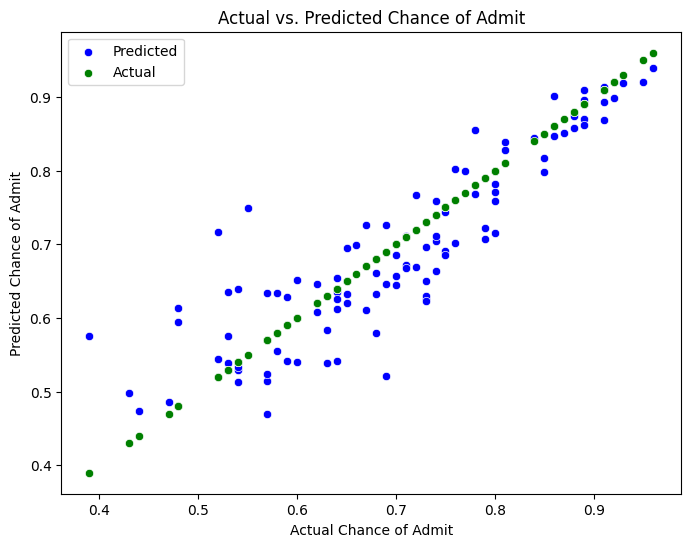

In [ ]:
predictions = model1.predict(X_test).flatten()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x=Y_test, y=predictions, color='blue', label='Predicted')
sns.scatterplot(x=Y_test, y=Y_test, color='green', label='Actual')  # Plot actual values

plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit')
plt.legend()  # Show the legend
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


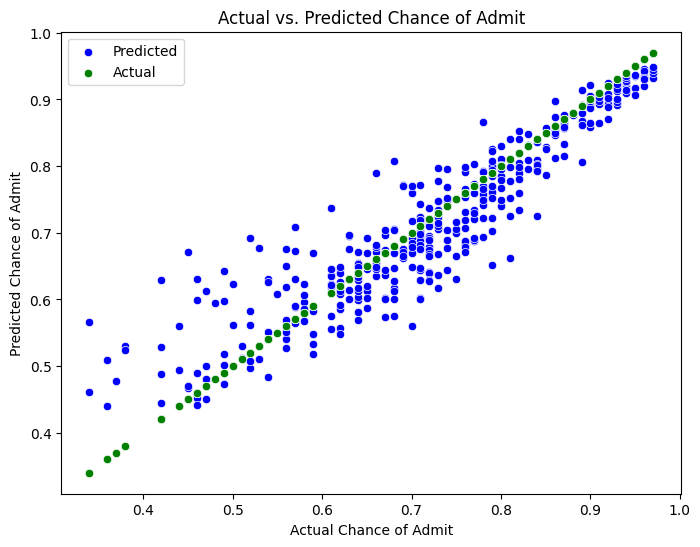

In [ ]:
predictions1 = model1.predict(X_train).flatten()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x=Y_train, y=predictions1, color='blue', label='Predicted')
sns.scatterplot(x=Y_train, y=Y_train, color='green', label='Actual')  # Plot actual values

plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit')
plt.legend()  # Show the legend
plt.show()

In [ ]:
# Example data for a new student (non-standardized)
new_student_data = [[320, 110, 3, 4, 4, 8.5, 1]]
new_data=scaler.transform(new_student_data)
# Make a prediction
predicted_chance = model.predict(new_data)

print("Predicted Chance of Admit:", predicted_chance[0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Predicted Chance of Admit: [0.6265565]
